# Symbolic Regression, for *your* data.

## Introduction

#### Use the Geppy GEP-RNC algorithm to produce an explainable AI model for your dataset.

This notbook makes applying geppy to *your* training dataset easy.

It is set out as a guided template - just configure your requriements and data, and hit run.
I have created it like a tutorial and training guide. If you have experience, just delete all my rambling, or click on the cell buttons to hide the text.

I strongly suggest you copy this notebook to a new project-specific file name, and modify as you wish.

#### Why this notebook?

Since publishing my first example of symbolic regression using Geppy a few years ago, several people have since written in to ask for help with their projects.

While it's fun to be helpful, I realised there is no easy guided tour that makes GEP __accessible__ to the causal researcher who really needs symbolic regression, but doesn't necessarily have the time to become an expert programmer of deap and geppy. 

So I decided to create one, and enable many people to benefit from explainable AI, making this great software more accesible.

Using this template with your tabular dataset, my hope is that you will be able to evolve a symbolic regression model for your own use case. It will be created using __*Gene Expression Programming*__ as the mechanism for generating your models, providing you well documented methodology to explain how you generated your results. Perhaps more importantly, the method is also interesting and engaging, and hopefully this will capture your users' imaginations too.

https://en.wikipedia.org/wiki/Gene_expression_programming

## Learn More

Places to get familiar with GEP and *geppy* are here:

+ [Introduction to gene expression programming](https://geppy.readthedocs.io/en/latest/intro_GEP.html)
+ [Overview of geppy for Gene Expression Programming (GEP)](https://geppy.readthedocs.io/en/latest/overview.html)

To check the detailed documentation of each function/class in *geppy*, please refer to [library reference](https://geppy.readthedocs.io/en/latest/#library-reference).

If you learn by reading books, I highly recommend reading the best book on the topic:
https://www.amazon.co.uk/Gene-Expression-Programming-Mathematical-Computational/dp/3540327967

#### How to use this template

This template will guide you through the following table of contents, with step by step instructions and helper functions to accelerate taking you through the various stages needed to deliver a genetic algorithm based ML project.

Start at the top, and work your way down in sequence through the cells, running them and checking they work as you go.
At the end the ML will launch and you will be able to review the results.

<span style="color:red">The places to add your own configuration are highlighted in red!</span>

As with all things - there is much you will learn going through the process yourself. I've included notes and links to materials you can read through to use this as a learning tutorial, as well as an accelerator.

I suggest you first set up an environment, fork this notebook, and from there you can add your data and dictionary and tailor your experiment to your needs.


#### Experimental Design

Every good science experiement has a method and structure that is clear and easily communicated. This template does too!

##### Table of Contents:
    
    ## Introduction
    #### Learn More
    #### How to use this template
    #### Experiment Outline
    
    # 0. Tools & Dependencies
    #### Imports
    #### Troublshooting installation help
    #### Seeds and Reproduceability
    
    # 1. Data
    ### 1.1 Organise Training Data
    ### 1.2 Load your data
    #### 1.2.1 Check symbols mapping
    ### 1.3 Exploratory Analysis
    ### 1.4 Prepare your data for ML
    #### Choose percent split for Test/Train
    #### Split into Test/Train
    #### Build Any Additional Features Needed
    #### Final Checks
    
    # 2. Design
    ### 2.1 Configure Evolution Inputs
    #### 2.1.1 Terminal Registration
    #### 2.1.2 Function Registration
    ### 2.2 Configure Evolution
    #### 2.2.1 Evolutionary Pressures
    #### 2.2.2 Gene Complexity
    #### 2.2.2.1 Choose Head, Number of Genes, Linking Function
    #### 2.2.3 Define the fitness evaluation function
    #### 2.2.4 Register genetic operators
    #### 2.2.5 Define Statistics to collect
    #### 2.2.3 Multiprocessing / Islands / Demes (NOT YET IMPLEMENTED)

    # 3. Run!
    #### 3.1 Launch Evolution

    # 4. Evaluate the Found Solution
    ### 4.1 Inspect
    #### 4.1.1 Simplify the best model
    #### 4.1.2 Formal presentation
    #### 4.1.3 Visualise the winning genetic structure

    
    ### 4.2 Measure Performance
    #### 4.2.1 Convert the Model into an Executable Function
    #### 4.2.2 Apply the model to Holdout data
    #### 4.2.3 Calculate MSE and R2 for holdout
    #### 4.2.4 Quick study of the holdout errors
    ### 4.3 Visualisation of Model Performance
    #### 4.3.1. Plot actual vs prediction
    #### 4.3.1. Plot actual vs prediction, zoom in
    
    # 5. Deployment
    ### 5.1 Notes on how to deploy

    # 6. Credits
    ### 6.1 Who
    #### Citing this work
    #### Geppy
    #### Deap
    ### 6.2 Usage
    #### License


In [1]:
#### The example in this notebook comes from this dataset regarding concrete strength:

# https://github.com/minkymorgan/Concrete-Dataset/blob/master/Concrete%20DataSet-SLR.ipynb

# generating training data is based on real experiements, and thus are expensive and hard to generate
# so it is idea for symbolic regression, which can operate on small datasets to create competitive models

# another benefit of symbolic regression, is that it is explainable. If there is a clear relationship between 
# the variables, it will discover it.

# 0. Tools and Dependencies

#### Imports

In [2]:
import geppy as gep
from deap import creator, base, tools
import numpy as np
import random
import numexpr
import pandas as pd

import operator 
import math
import datetime
import graphviz
import os
from numba import jit
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import uncompyle6
import numexpr

#### Help: Troublshooting Installation 

In [3]:
# troubleshooting note 1:

# recently setuptools depreciated some things that deap relied on to convert python27 code to python3 code
# my recent fresh install gave me alot of headaches installing deap. The solution that worked for me was:

# pip install setuptools==58
# pip install deap

# note that you may be using a virtual environment setup, so doublecheck how to install for your environment

In [4]:
# troubleshooting note 2:

# If you are missing some things, it's not just python that needs setting up.
# There may be some actual server side installs to do,
# for example, graphviz may not be installed on your machine. For mac:

# brew install graphviz

# will install it on your system. pip install graphviz, installs the api to this executable.
# For python things, you can install them from right in your notebook if needed, using this syntax:

# !pip install geppy

# If you are new to jupyter and virtual environments, this is useful: https://stackoverflow.com/questions/42449814/running-jupyter-notebook-in-a-virtualenv-installed-sklearn-module-not-available


### Reproducibility

#### Repoducible Random Numbers

It's important to be able to reproduce experimental results, so set a random seed below, to activate it.

This will carry the seed into numpy too. when you rerun the notebook, you should get exactly the same results from the evolutionary run if you are not sure what this is all about, read this: https://en.wikipedia.org/wiki/Random_seed

##### <span style="color:red">Configure your seed below:</span>

In [5]:
# pick your seed, set it to s. It will force python to use it, as well as numpy.
s = 20
random.seed(s)
np.random.seed(s)

# set s to be the seed you want, and it will configure the whole notebook.

#### Declaring Installed libraries

Every now and again I hear people need to also declare the software stack they use for reproducibility reporting. In cloud environments this can be hard sometimes. If needed you can report on python packages and versions you have installed in this notebook, so you can truly recreate the experiment just as it's run here.

In [6]:
# This will list software is used within your notebook. 
# It's Handy in cloud notebook environemnts given to you.

# uncomment to run, it will list every package available to your notebook ... which could be a long list!
#!pip freeze

##### Defaults you can override later. (Don't edit here)

In [7]:
# some defaults to drive the rest of the notebook are below. 
# DO NOT EDIT HERE - Edit cell 21
normalisation = 0
TryFeaturesOnly = 0

# 1. Data

When collecting data is expensive, and you have less than a thousand observations - symbolic regression comes to the rescue. You don't need gigabytes of training data to get a meaningful result like you might with deep learning approaches for example.

This notebook assumes that you are starting out with a simple tabular file, like a csv file, that holds your observations.
For some this will be too simplistic, but for the vast majority of people, this choice will be fine. The reason is that symbolic regression is a mechanism for doing machine learning that is perfect for "SmallData". SmallData is like bigdata, but, well smaller, and far more common.

## 1.0 Preparing your input data

When you obtain your dataset, you'll discover that it's typically not got column headers, or variable names that are good for symbolic regression. So I highly suggest that you do the following.

Create a new dataset with better column names, and then create a data dictionary, to document what you did.
I've actually built this notebook to REQUIRE you to do this step, so you are forced to follow best practice. 

Below is an example of a regression dataset posted on github, which has names we need to remap, and how to construct the data dictionary.

#### Build a dataset

Create a tabular dataset for your observations that has named columns. 

For many this means a spreadsheet - if so save it as a csv file. For others this means directly creating a delimited file, like a csv or tsv file, from instrumentation. If you have nested json data, create your own preprocess to flatten it to simple tabular data. I can't guess what you are starting with - but your target is to create a flat delimted file. These work best.

When creating data, give these columns __unique__, meaningful, and __very short names__ (it helps a lot with readability) that do not have any punctuation or special characters in them (definately no whitespace please!). When we present a final symbolic regression equation that we find to solve your problem, this will keep our equation symbols concise and readable.

Within the data file, I highly recommend that you have a single column containing the learning target, the thing you want to predict. 

Call the learning target value something short everyone will understand. I you have no good name, I suggest that __Y__ is a standard name for the observed target value you collect along with your observations. Later when we build a model to guess __Y__ for new observations, __Yp__ will be used, and it means the "predicted value of Y". If you have a particular variable name you'd like to guess, keep it short and meaningful. Example "Concrete compressive strength(MPa, megapascals)" becomes CCS. Predictions are CCSp.

__IMPORTANT__ Put your target data in the last and final column (meaning that column "furthest to the right") in your datafile. This placement is generally just good practice. In this notebook, however, is dynamically configured from a data dictionary - so this is not mandatory.

#### IMPORTANT, you **must** provide a data dictionary to use this notebook.

This notebook will read those column headers, to assign them to symbols in the final output equations. Like with any decent physics text book, you will need to declare what each symbol means. It sounds obvious, but create a data dictionary (often called a file layout, that names each symbol in your file, and sets out a human readable description. 

#### Example Data Dictionary

In [8]:
# Edit or recreate a dictionary file, using the template I provided.
# Be sure that your dictionary lists columns in field order.
# keep the column headers in the dictionary the same
# Type field must have values "Input" or "Target", capitalisation is important.
# number your fields properly.

exampleDictionary = pd.read_csv('exampleData/UCI_PowerPlant_dictionary.csv')
exampleDictionary.head(10)

# don't forget to give your csv file, the headers you see below!

,Field,Symbol,Type,Description
0,1,AT,Input,Atmospheric Temperature(Celius)
1,2,V,Input,Exhaust Vacuum (cm Hg)
2,3,AP,Input,Ambient Pressure (milibar)
3,4,RH,Input,Relative Humidity (%)
4,5,PE,Target,Plant Output Energy (MegaWatt)


#### Example Dataset, Organised for Geppy

In [9]:
# read in the data to pandas
exampleData = pd.read_csv('exampleData/UCI_PowerPlant_data.csv')
exampleData.tail(10)

,AT,V,AP,RH,PE
9558,20.18,43.56,1013.14,39.16,462.80
9559,18.51,50.90,1012.95,82.71,459.11
9560,13.60,39.82,1013.34,86.10,470.69
9561,33.42,68.51,1011.91,45.83,427.66
9562,13.79,42.07,1018.27,88.06,462.25
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


##  1.1 Load your data

Put your data into the load directory for this notebook, so that it is easily found.
There is a subdirectory to hold it called "data." 

The first job is to check you have the right files:

#### <span style="color:red">Name your input directory:</span>

In [10]:
# CONFIGURE
# enter the name your subdirectory for input data. Here I call it "data" but you can call it what ever you want.
yourDataFolder = 'data'

# we will doublecheck the data is there
yourDataDir = yourDataFolder + "/"
print(os.getcwd()+"/" + yourDataDir)
print(os.listdir("./" + yourDataDir))

/Users/andrew.morgan/dev/geppy/data/
['numerical_expression_tree', 'Concerte_Data_dictionary.csv', 'airfoil_self_noise.csv', 'concrete-dataset.csv', 'Concerte_Data.csv', 'concrete-dataset_dictionary.csv', 'UCI_PowerPlant_dictionary.csv', 'airfoil_self_noise-dictionary.csv', 'numerical_expression_tree.png', 'UCI_PowerPlant_data.csv', 'airfoil_self_noise.dat', 'tmp', 'dictionary.csv']


#### <span style="color:red">Load and Inspect your data dictionary: </span>

In [11]:
# CONFIGURE
yourDictionary = pd.read_csv(yourDataDir + 'UCI_PowerPlant_dictionary.csv')
yourDictionary.head(10)

,Field,Symbol,Type,Description
0,1,AT,Input,Atmospheric Temperature(Celius)
1,2,V,Input,Exhaust Vacuum (cm Hg)
2,3,AP,Input,Ambient Pressure (milibar)
3,4,RH,Input,Relative Humidity (%)
4,5,PE,Target,Plant Output Energy (MegaWatt)


**(YOU MUST PROVIDE A DATA DICTIONARY FILE)**

#### <span style="color:red">Load your data file to pandas: </span>

In [12]:
# CONFIGURE
# read in the data to pandas
# have a quick inspect it looks good:
yourData = pd.read_csv(yourDataDir + 'UCI_PowerPlant_data.csv')
yourData.head(100)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
95,26.63,64.44,1012.66,61.19,442.00
96,18.87,52.08,1005.25,99.19,449.61
97,5.12,40.78,1025.45,96.88,481.28
98,31.10,71.32,1008.09,45.87,437.54


### 1.2.1 Check symbols mapping

##### Make sure we are all good with our symbols and dictionaries, cache the lists:

In [13]:
# Autoconfigure names of your data inputs, your "symbols" for symbolic regression.
yourSymbols = yourData.columns.tolist()
colDesc = yourDictionary.sort_values(by=['Field'])['Description'].to_list()
print(yourSymbols)

['AT', 'V', 'AP', 'RH', 'PE']


##### Descriptive metrics, for human readers

In [14]:
# yourDictionary.sort_values(by=['Field'])['Description'].tolist()
# notice, you can swap out your short symbols for the long descriptions. Data Dictionaries work.
yourData.columns = colDesc
yourData.describe()

,Atmospheric Temperature(Celius),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Plant Output Energy (MegaWatt)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


##### Descriptive metrics, reported by symbol:

In [15]:
# here's the same data we'll work with, mapped back to yours symbols
yourData.columns = yourSymbols
yourData.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Review the descriptive statistics tables above. Check you are happy you have mapped your data to symbols properly.

## 1.3 Exploratory Data Analysis


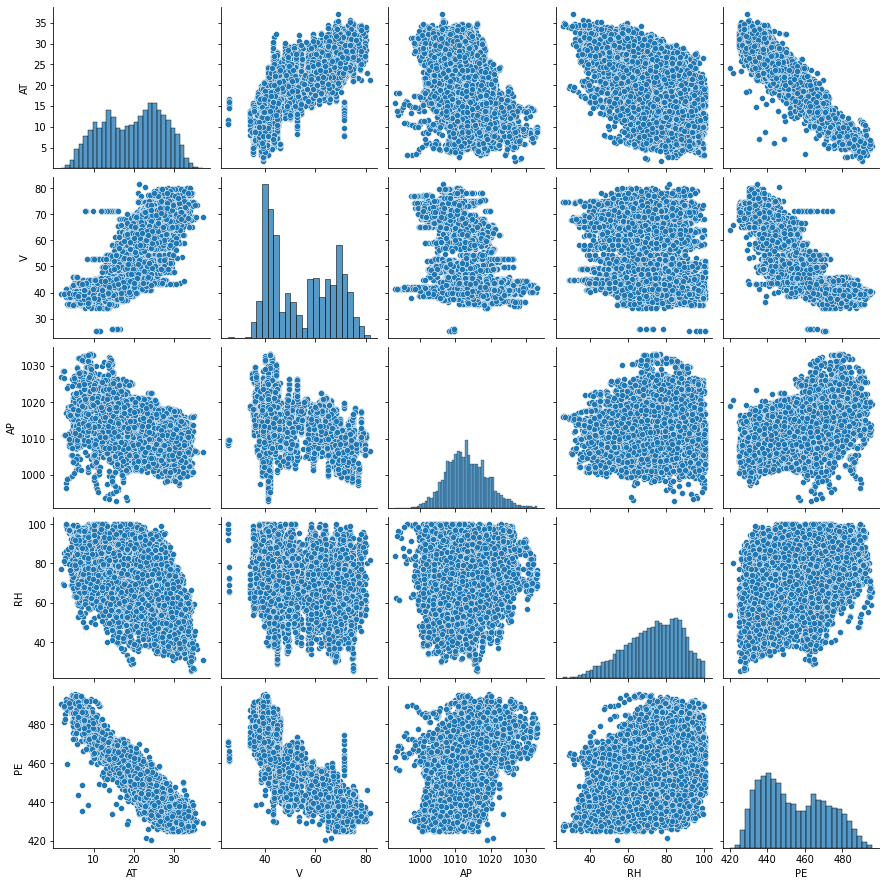

In [16]:
%matplotlib inline
# no EDA is complete without one of these
sns.pairplot(data = yourData, vars=yourSymbols)
plt.show()

##  1.4 Prepare your data for ML

#### 1.4.1 <span style="color:red">Chose your test/train split</span>

In [17]:
# CONFIGURE the amount of data for training, the remainder is for testing
split = 0.5

In [18]:
msk = np.random.rand(len(yourData)) < split

#### Create separate test and train datasets

In [19]:
train = yourData[msk]

In [20]:
holdout = yourData[~msk]

#### 1.4.2 Build any additional features

Notes on Features:

The question of whether normalising data might help symbolic regression to construct models came up. My first thought was maybe no.

But then it occured to me Geppy has no concept of any value outside of the immediate observation to reason with, and if it had an understanding of things at the training dataset level, like the average of a value, or its standard deviation, it might evolve things like a z-score (xbar - obs/stdev) as part of the search algorithm, and this would be a possibility it could use or ignore. At worst, the values would simply be rich random numeric constants, to add to those we already are searching. So it can't harm the process, but could benefit the process.

To test this, we can construct these additional features now, to provide the data to geppy.
These next cells show you how:

#### <span style="color:red">If you want to try normalisation features, configure it here:</span>

In [21]:
# CONFIGURE: override the 0 default the value to 1, to create average, stdev and zscore based features.
# if you wish to exclude raw data, and ONLY pass along z-scores, set this TryOnlyFeatures to one.

# EDIT HERE

normalisation = 0
TryFeaturesOnly = 0


#### 1.4.2.1 Build the features

In [22]:
# below I apply features. If you're not sure what it does, don't edit.
yourDictionary.loc[(yourDictionary['Type'] == 'Input')].sort_values(by=['Field'])['Symbol'].to_list()

['AT', 'V', 'AP', 'RH']

In [23]:
def addDataFeature(trainframe, holdoutframe, terminals):
    trainf = pd.DataFrame(trainframe)
    holdoutf = pd.DataFrame(holdoutframe)
    yourDict = pd.DataFrame(yourDictionary)
    
    onlyinputs = yourDict.loc[(yourDict['Type'] == 'Input')].sort_values(by=['Field'])['Symbol'].to_list()
    terminals = []
    featuresOnly = []
    #print(yourDict)
    
    for name in onlyinputs:
        # train
        # create functions and apply them to train data
        # mean
        print(name)
        genfeatures = 'avg' + name + ' = ' + name + '.mean()'
        trainf.eval(genfeatures, inplace = True)
        avgval = trainf['avg' + name].max()
        terminals.append(name)
        terminals.append('avg' + name)
        
        # std
        genfeatures = 'std' + name + ' = ' + name + '.std()'
        trainf.eval(genfeatures, inplace = True)
        stdval = trainf['std' + name].max()
        terminals.append('std' + name)
        
        # zscores
        genfeatures = 'z' + name + ' = (' + name + '- avg' + name +')/' + 'std' + name
        trainf.eval(genfeatures, inplace = True) 
        terminals.append('z' + name)
        #     Here we isolate just the z-scores and cache just those terminal names
        featuresOnly.append('z' + name)
        
        # holdout - apply features to holdout - based on avg,std of seen training data (no bleed of past into future)
        # avg
        avgVal = str(trainf['avg' + name].max())
        genfeatures = 'avg' + name + ' = ' + avgVal
        holdoutf.eval(genfeatures, inplace = True)
        # std
        stdVal = str(trainf['std' + name].max())
        genfeaturesD = 'std' + name + ' = ' + stdVal
        holdoutf.eval(genfeaturesD, inplace = True)   
        # zscores
        genfeatures = 'z' + name + ' = (' + name + '- avg' + name +')/' + 'std' + name
        
        holdoutf.eval(genfeatures, inplace = True) 

    return trainf, holdoutf, terminals, featuresOnly


In [24]:
# default the final terminals to the core dataset
finalTerminals = yourDictionary.loc[(yourDictionary['Type'] == 'Input')].sort_values(by=['Field'])['Symbol'].to_list()
finalTerminals

['AT', 'V', 'AP', 'RH']

In [25]:
finalTarget = yourDictionary.loc[(yourDictionary['Type'] == 'Target')].sort_values(by=['Field'])['Symbol'].to_list()
finalTarget

['PE']

In [26]:
# if you normalise, update the data frames, and the final terminals list
if normalisation == 1:
    train, holdout, finalTerminals, ZscoreTerminals = addDataFeature(train, holdout, yourDictionary)

In [27]:
# now we have constructed out data features, we have a new set of final symbols held in our list
print(finalTerminals)

['AT', 'V', 'AP', 'RH']


In [28]:
train.info()
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4696 entries, 4 to 9565
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      4696 non-null   float64
 1   V       4696 non-null   float64
 2   AP      4696 non-null   float64
 3   RH      4696 non-null   float64
 4   PE      4696 non-null   float64
dtypes: float64(5)
memory usage: 220.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      4872 non-null   float64
 1   V       4872 non-null   float64
 2   AP      4872 non-null   float64
 3   RH      4872 non-null   float64
 4   PE      4872 non-null   float64
dtypes: float64(5)
memory usage: 228.4 KB


In [29]:
train.head()

,AT,V,AP,RH,PE
4,11.80,40.66,1017.13,97.20,464.43
6,22.10,71.29,1008.20,75.38,442.35
9,6.77,38.18,1017.80,81.13,484.31
10,28.28,68.67,1006.36,69.90,435.29
15,22.72,64.15,1021.14,60.34,453.13


In [30]:
holdout.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
5,13.97,39.16,1016.05,84.60,470.96


#### Final Checks

In [31]:
# check the holdout dataset
holdout.describe()

,AT,V,AP,RH,PE
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,19.718389,54.583132,1013.261234,73.251377,454.186568
std,7.447617,12.761526,5.955178,14.709320,17.070087
min,1.810000,25.360000,993.740000,26.300000,421.570000
25%,13.607500,41.760000,1009.137500,63.347500,439.647500
50%,20.540000,53.160000,1013.000000,74.895000,451.000000
75%,25.720000,66.560000,1017.220000,84.835000,468.190000
max,35.200000,80.180000,1033.300000,100.150000,495.760000


In [32]:
# check the training data
train.describe()

,AT,V,AP,RH,PE
count,4696.000000,4696.000000,4696.000000,4696.000000,4696.000000
mean,19.581557,54.018081,1013.256842,73.368737,454.550138
std,7.457662,12.646941,5.922360,14.487586,17.063632
min,2.340000,25.360000,992.890000,25.560000,420.260000
25%,13.427500,41.670000,1009.090000,63.270000,439.925000
50%,20.210000,51.190000,1012.910000,75.010000,452.020000
75%,25.722500,66.480000,1017.312500,84.822500,468.662500
max,37.110000,81.560000,1033.290000,100.160000,495.230000


# 2. Design

### 2.2 Configure Evolution Inputs

#### Introduction

The first step in GEP (or GP as well) is to specify the primitive set, which contains the elementary building blocks to formulate the model. For this problem, we have:
+ function set: the standard arithmetic operators addition (+), subtraction (-), multiplication (*), and division (/).
+ terminal set: the mapping of our data columns to variables "terminals", plus we include random numerical constants (RNC).

NOTE:

- We must define a *protected division* to avoid dividing by zero.
- We can create any function that won't produce NAN, ever
- Even there may be multiple RNCs in the model, we only need to call `PrimitiveSet.add_rnc` once.
- If we created features in the data, we can add them to our dataset directly, for mapping to terminals
- Alternatively, we can also define Constants as a terminal in geppy. Pi could be an example. Note that Outside of geppy evolution, other programs will need access to these values too to use then to calculate.

#### 2.2.1 Terminal Registration

In [33]:
# if you Only wish to work with the normalised z-score outputs set this flag
# then go back to cell_21 and set:  TryFeaturesOnly = 1

In [34]:
# build the final list of data to feed in, the symbols become "terminals"

# notice we push in finalTerminals which could include features too
# we set them for use in geppy by assigning these symbol names using pset

if TryFeaturesOnly == 1:
    pset = gep.PrimitiveSet('Main', input_names=ZscoreTerminals)
    # doublecheck:
    print('setting: ', ZscoreTerminals, ' as the *Only* symbols to reason over in our final equation')
else:
    pset = gep.PrimitiveSet('Main', input_names=finalTerminals)
    # doublecheck:
    print('setting: ', finalTerminals, ' as the *Only* symbols to reason over in our final equation')    

setting:  ['AT', 'V', 'AP', 'RH']  as the *Only* symbols to reason over in our final equation


In [35]:
# Auto create global numpy arrays, to remove hardcoding.

# We must also make our terminals globally accessible, as numpy arrays, until I rebuild the individual evaluation function.
# so I have his terrible hack here that takes each Terminal set, and turns it into a numpy array available globally
# It assigns our symbols as global variables, and to numpy arrays built from our train dataset

print('we will use these in the final regression:')
if TryFeaturesOnly == 1:
    for term in ZscoreTerminals:
        globals()[str(term)] = train[term].values
        print('setting ', term)
else:
    for term in finalTerminals:
        globals()[str(term)] = train[term].values
        print('setting ', term)
        
# while it works, it's not normal best practice.
# Best to stop the kernal and rerun the notebook between data sets!

we will use these in the final regression:
setting  AT
setting  V
setting  AP
setting  RH


In [36]:
# We also need to set out target data from the training set to a global variable, called Y

Y = train[yourDictionary.loc[(yourDictionary['Type'] == 'Target')].sort_values(by=['Field'])['Symbol'].tolist()[0]].values

In [37]:
type(Y)

numpy.ndarray

In [38]:
# while we're at it, lets set a global variable for the holdout known targets Yt
# createa a global reference in python to fetch our holdout target values, named Yt

Yh = holdout[yourDictionary.loc[(yourDictionary['Type'] == 'Target')].sort_values(by=['Field'])['Symbol'].tolist()[0]].values

In [39]:
type(Yh)

numpy.ndarray

#### 2.1.2 Function Registration

In [40]:
# below define any bespoke functions you will reason with in symbol regression

In [41]:
# we need to define our own protected divide, so we never emit 1/0 exceptions
def protected_div(x1, x2):
    if abs(x2) < 1e-6:
        return 1
    return x1 / x2

In [42]:
# to figure out if special functions help lets define some:
# this is the sigmoid function used to preprocess data in many ml setups

import math

# These functions work well on data that has been cast into a tight range. 
# if we use them on data having giant ranges, they will produce nan's and other issues.
# so, only Use these functions if we restrict our inputs to the z-scores, which are in a tight range

# sigmoid
def sig(x):
    y = (x**2)**(1/2)
    s= 1/(1 + 2.7182818284**(-y))
    ds = s*(1-s)
    return s

# sigmoid derivative
def dsig(x):
    y = (x**2)**(1/2)
    s= 1/(1 + 2.7182818284**(-y))
    ds = s*(1-s)
    return ds

##### 2.1.2.1 here are some alternative linker functions, which accept any number of genes

In [43]:
# it is possible to define functions like Average, which we might use as a linker function.
# if used as a primary operator, we'll need to decide how many inputs to feed it, called the "arity".

def avgval(*n):
    sums = 0
    for t in n:
        sums = sums + t
    avg = sums / len(n)
    return avg

In [44]:
# Another linker function is simply to multiply the inputs
# this accepts any "arity", meaning any number of gene inputs

def mulval(*n):
    total = 1
    for t in n:
        total = total * t
    return total

In [45]:
# Another linker function is simply to add all the inputs
# this accepts any "arity", meaning any number of gene inputs

def addval(*n):
    total = 0
    for t in n:
        total = total + t
    return total

##### <span style="color:red">If you defined new functions, register them into the pset, below:</span>

In [46]:
pset.add_function(operator.add, 2)
pset.add_function(operator.sub, 2)
pset.add_function(operator.mul, 2)
pset.add_function(protected_div, 2)

# note I am registering avgval, with fixed of 2, to use it insides a gene, in addition to being a linking function.

#pset.add_function(avgval, 2)
#pset.add_function(addval, 5)
#pset.add_function(mulval, 5)

# health warning:
# don't use the following functions on large raw data values. 
# They work best on data with a max range like (-10, 10). If you have new functions that only accept z-score type data
# add them under this if statement, then you can allow users to optionally use these functions, automatically.
if TryFeaturesOnly == 1:
    pset.add_function(dsig, 1)
    pset.add_function(sig, 1)


# Optional functions here:
# note there are odd issues where numexpr expects "arctan" and smypy uses atan ... and it's problematic. exclude these till its sorted.

#pset.add_function(math.sin, 1)        # I tested adding trig functions
#pset.add_function(math.atan, 1)        # I tested adding trig functions

pset.add_rnc_terminal()


##### <span style="color:red">If you defined/used new functions above, update the function map, below:</span>

In [47]:
# if we start to use custom functions, we need to manually override the default symbol maps
# so we can see our final output properly simplified

# start by defining a custom map like this. See that I added my custom functions, including "avgval", near the bottom.

# note this map is only needed to visualise and simplify the final constructed solution.
# while not strictly necessary, it is very very handy, so I show here how I have mapped in a new function I 
# defined into the map, avgval, which determines the average value of two input parameters
# 
import sympy as sp

CUSTOM_SYMBOLIC_FUNCTION_MAP = {
    operator.and_.__name__: sp.And,
    operator.or_.__name__: sp.Or,
    operator.not_.__name__: sp.Not,
    operator.add.__name__: operator.add,
    operator.sub.__name__: operator.sub,
    operator.mul.__name__: operator.mul,
    operator.neg.__name__: operator.neg,
    operator.pow.__name__: operator.pow,
    operator.abs.__name__: operator.abs,
    operator.floordiv.__name__: operator.floordiv,
    operator.truediv.__name__: operator.truediv,
    'protected_div': operator.truediv,
    math.log.__name__: sp.log,
    math.sin.__name__: sp.sin,
    math.cos.__name__: sp.cos,
    math.tan.__name__: sp.tan,
    'avgval': avgval,
    'addval': addval,
    'mulval': mulval,
    'sig': sig,
    'dsig': dsig
}

## 2.2 Configure Evolution

In this section we will configure geppy and the evolutionary process.
These configurations can have big effects on the outcome. The following cells take you through the configuration step by step, and offers good standard defaults and choices. As you learn and explore symbolic regression, and GEP. You can duplicate the notebook and make alterations to these configurations to run many experiments.

### 2.2.1 Evolutionary Pressure

We first need to "create" a concept of an individual, and specify how they are generated, and what their fitness metric for evolution will be. We do this by creating a FitnessMin with a weight of -1. This means we attempt to evolve individuals, such that we minimise this value. If we wanted to maximise a metric, the weight would be 1.
Later we will specify a "evaluator" for individuals, and it will create the numeric values, and calculate them. In our case we default to calculating the MSE.

In [48]:
# set up our fitness objectives
creator.create("FitnessMin", base.Fitness, weights=(-1,))                # -1 to minimize the objective (fitness)
creator.create("Individual", gep.Chromosome, fitness=creator.FitnessMin) # create, with FitnessMin configured.


## 2.2.2 Gene Complexity

Register the individual and population creation operations
In DEAP, it is recommended to register the operations used in evolution into a *toolbox* to make full use of DEAP functionality. The configuration of individuals in this problem is:
+ head length: 6
+ number of genes in each chromosome: 2
+ RNC array length: 8

Generally, more complicated problems require a larger head length and longer chromosomes formed with more genes. **The most important is that we should use the `GeneDc` class for genes to make use of the GEP-RNC algorithm.**

#### Your Core Settings Defined Here

Below are parameters that design how your problem is solved genetically. In GEP all genes have a biologically inspired gene and chromosome design that can evolve, and then be expressed into an abstract syntax tree AST, used to create executable code. The complexity of a single gene is controlled by the HEAD, which defines how large an AST could be, and a linker function pulls these small ASTs into a larger one representing the final solution. There is a parameter that allows us to draw on a collection of Random Numerical Constants which includes an array of random numbers.

Guidance.

A bigger head, means bigger solution ASTs, and also larger search space across more complex final solution equations. Increasing this will increase the complexity, and reduce the explainability of the model.

#### 2.2.2.1 <span style="color:red"> Edit your gene setup:</span>

## <span style="color:red"> --- Choose Head, Number of Genes, Linking Function --- </span>

In [49]:
# this is the main configuration of the genes you'll want to play with.

h = 8             # head length
n_genes = 4        # number of genes in a chromosome, we will average/mul/add across them in the linker
r = 10             # length of the RNC array
enable_ls = True    # whether to apply the linear scaling technique

## todo - create a simple configuration to choose how to link many genes, add them up, or average across them
## right now, if you choose more than one gene, it will average the outputs across all of them.
## The reason to try the Average as a linker, is that each gene can be a weak model, and the average could be better
## than all of the smaller models. It's an idea from things like random forests..

#link_genes_using_the_avg = 1
#link_genes_using_add =0

**NOTE** Above you define the gene structure which sets out the maximum complexity of the symbolic regression

In [50]:
# Here we configure geppy population and chromosome

toolbox = gep.Toolbox()
toolbox.register('rnc_gen', random.randint, a=-1000, b=1000)   # each RNC is random integer within [-5, 5]
toolbox.register('gene_gen', gep.GeneDc, pset=pset, head_length=h, rnc_gen=toolbox.rnc_gen, rnc_array_length=r)


#### 2.2.2.1 Your <span style="color:red">__LINKER__</span> functions are configured here"

In [51]:
# This will configure how many genes are linked.

# LINKER functions defined here
# options are avgval, mulval, addval

if n_genes > 1:
    #   Add gene outputs
    #toolbox.register('individual', creator.Individual, gene_gen=toolbox.gene_gen, n_genes=n_genes, linker=addval)
    #   multiply gene outputs
    #toolbox.register('individual', creator.Individual, gene_gen=toolbox.gene_gen, n_genes=n_genes, linker=mulval)
    #   average gene outputs
    toolbox.register('individual', creator.Individual, gene_gen=toolbox.gene_gen, n_genes=n_genes, linker=avgval)
else:
    toolbox.register('individual', creator.Individual, gene_gen=toolbox.gene_gen, n_genes=n_genes)


In [52]:
# compile utility: which translates an individual into an executable function (Lambda)
toolbox.register('compile', gep.compile_, pset=pset)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

### 2.2.3 Define the fitness evaluation function
In DEAP, the single objective optimization problem is just a special case of more general multiobjective ones. Since *geppy* is built on top of DEAP, it conforms to this convention. **Even if the fitness only contains one measure, keep in mind that DEAP stores it as an iterable.** 

Knowing that, you can understand why the evaluation function must return a tuple value (even if it is a 1-tuple). That's also why we set ``weights=(-1,)`` when creating the ``FitnessMax`` class.

In [53]:
if TryFeaturesOnly == 0:
    type(finalTerminals)
    param_string = ", ".join(finalTerminals)
    print('the params below are args to the lambda function we evolve in geppy, set dynamically \n\n')
    print(param_string)
else:
    type(ZscoreTerminals)
    param_string = ", ".join(ZscoreTerminals)
    print('the params below are args to the lambda function we evolve in geppy, set dynamically \n\n')
    print(param_string)    

the params below are args to the lambda function we evolve in geppy, set dynamically 


AT, V, AP, RH


In [54]:
def evaluate(individual):
    
    """Evalute the fitness of an individual: MAE (mean absolute error)"""
    func = toolbox.compile(individual)
     
    # below call the individual as a function over the inputs
    # if we restrict to Only the Zscore features, we need to swap this
    if TryFeaturesOnly == 1:
        param_string = ", ".join(ZscoreTerminals)
    else:
        param_string = ", ".join(finalTerminals)
    
    # here we create the function to evaluate, as a dynamic string we later evaluate
    funcstring = 'np.array(list(map(func, ' + param_string + ')))'
    
    Yp = eval(funcstring)
    
    # return the MSE as we are evaluating on it anyway - then the stats are more fun to watch...
    return np.mean((Y - Yp) ** 2),

#### [optional] Enable the linear scaling technique. 

It is hard for GP to determine real constants, which are important in regression problems. Thus, we can (implicitly) ask GP to evolve the shape (form) of the model and we help GP to determine constans by applying the simple least squares method (LSM).

In [55]:

def evaluate_ls(individual):
    """
    First apply linear scaling (ls) to the individual 
    and then evaluate its fitness: MSE (mean squared error)
    """
    func = toolbox.compile(individual)

    # below call the individual as a function over the inputs
    # if we restrict to Only the Zscore features, we need to swap this
    if TryFeaturesOnly == 1:
        param_string = ", ".join(ZscoreTerminals)
    else:
        param_string = ", ".join(finalTerminals)
        
        
    # here we create the function to evaluate, as a dynamic string we later evaluate
    funcstring = 'np.array(list(map(func, ' + param_string + ')))'
    
    Yp = eval(funcstring)
    
    # special cases which cannot be handled by np.linalg.lstsq: (1) individual has only a terminal 
    #  (2) individual returns the same value for all test cases, like 'x - x + 10'. np.linalg.lstsq will fail in such cases.
    # That is, the predicated value for all the examples remains identical, which may happen in the evolution.
    if isinstance(Yp, np.ndarray):
        Q = np.hstack((np.reshape(Yp, (-1, 1)), np.ones((len(Yp), 1))))
        (individual.a, individual.b), residuals, _, _ = np.linalg.lstsq(Q, Y, rcond=None)   
        # residuals is the sum of squared errors
        if residuals.size > 0:
            return residuals[0] / len(Y),   # MSE
    
    # regarding the above special cases, the optimal linear scaling w.r.t LSM is just the mean of true target values
    individual.a = 0
    individual.b = np.mean(Y)
    return np.mean((Y - individual.b) ** 2),



In [56]:
if enable_ls:
    toolbox.register('evaluate', evaluate_ls)
else:
    toolbox.register('evaluate', evaluate)

### 2.2.4 Register genetic operators
Compared with GP and other genetic algorithms, GEP has its own set of genetic operators aside from common mutation and crossover. For details, please check the tutorial [Introduction to gene expression programming](https://geppy.readthedocs.io/en/latest/intro_GEP.html).

The following operators are specially designed for GEP in *geppy*. Tournament selection done by DEAP, in later sections.

In [57]:
# unless you know what you are doing, I suggest you don't edit these configurations.
# they control how the genes mutate and evolve

# 1. general operators
toolbox.register('mut_uniform', gep.mutate_uniform, pset=pset, ind_pb=0.05, pb=1)
toolbox.register('mut_invert', gep.invert, pb=0.1)
toolbox.register('mut_is_transpose', gep.is_transpose, pb=0.1)
toolbox.register('mut_ris_transpose', gep.ris_transpose, pb=0.1)
toolbox.register('mut_gene_transpose', gep.gene_transpose, pb=0.1)
toolbox.register('cx_1p', gep.crossover_one_point, pb=0.3)
toolbox.register('cx_2p', gep.crossover_two_point, pb=0.2)
toolbox.register('cx_gene', gep.crossover_gene, pb=0.1)
# 2. Dc-specific operators
toolbox.register('mut_dc', gep.mutate_uniform_dc, ind_pb=0.05, pb=1)
toolbox.register('mut_invert_dc', gep.invert_dc, pb=0.1)
toolbox.register('mut_transpose_dc', gep.transpose_dc, pb=0.1)
# for some uniform mutations, we can also assign the ind_pb a string to indicate our expected number of point mutations in an individual
toolbox.register('mut_rnc_array_dc', gep.mutate_rnc_array_dc, rnc_gen=toolbox.rnc_gen, ind_pb='0.5p')
toolbox.pbs['mut_rnc_array_dc'] = 1  # we can also give the probability via the pbs property



### 2.2.5 Define Statistics to collect
We often need to monitor of progress of an evolutionary program. DEAP offers two classes to handle the boring work of recording statistics. Details are presented in [Computing statistics](http://deap.readthedocs.io/en/master/tutorials/basic/part3.html). In the following, we are intereted in the average/standard deviation/min/max of all the individuals' fitness in each generation.

In [58]:
# I've simplified this to track only the Min MSE which is our primary objective. 
stats = tools.Statistics(key=lambda ind: ind.fitness.values[0])
stats.register("min MSE", np.min)

# 3.0 Run!

## 3.1 Configure and Launch evolution


We make use of *geppy*'s builtin algorithm ``gep_rnc`` here to perform the GEP-RNC evolution. 

A special class from DEAP, `HallOfFame`, is adopted to store the best individuals ever found. Besides, it should be noted that in GEP [*elitism*](https://en.wikipedia.org/wiki/Genetic_algorithm#Elitism) is highly recommended because some genetic operators in GEP are destructive and may destroy the best individual we have evolved.

#### 3.1.1 <span style="color:red">Edit your Population Size setup here:</span>

In [59]:
# a tournament pulls in x individuals, and picks a best. It drives reproduction candidates, and thus evolution.
# We will configure our desired tournament size, then work out the population we need to support it.

tournament = 15

# don't edit this:
toolbox.register('select', tools.selTournament, tournsize=tournament)

# don't edit this:
n_pop = ceiling(tournament*100/7)

#### 3.1.2 <span style="color:red">Edit your Generations, and Hall of Fame here:</span>

In [60]:
# define the number of generations to evolve over here.
n_gen = 200
print("the population size for a tournament of size ",tournament, " is optimally ",n_pop)

# we keep a hall of fame, hof, and this configures how many to hold. adjust as you need.
champs = 3

the population size for a tournament of size  15  is optimally  215


In [61]:
# set out the final configurations. 
# Don't edit:
pop = toolbox.population(n=n_pop) # 
hof = tools.HallOfFame(champs)   # only record the best three individuals ever found in all generations

In [62]:
startDT = datetime.datetime.now()
print (str(startDT))

2022-06-23 15:47:08.733644


#### 3.2 <span style="color:red">This cell starts the Run. </span>

In [63]:
# start evolution. You can run it several times if you want, to extend the generations if needed.

pop, log = gep.gep_simple(pop, toolbox, n_generations=n_gen, n_elites=1,
                          stats=stats, hall_of_fame=hof, verbose=True)

gen	nevals	min MSE
0  	215   	24.5363
1  	214   	21.7488
2  	214   	21.7381
3  	214   	21.5412
4  	214   	21.0015
5  	214   	20.9989
6  	214   	20.7257
7  	214   	20.7257
8  	214   	20.4372
9  	214   	20.4372
10 	214   	20.2177
11 	214   	19.7061
12 	214   	19.634 
13 	214   	19.6309
14 	214   	19.6309
15 	214   	19.6299
16 	214   	19.6261
17 	214   	19.6243
18 	214   	19.6095
19 	214   	19.5758
20 	214   	19.5758
21 	214   	19.5758
22 	214   	19.5489
23 	214   	19.5488
24 	214   	19.5188
25 	214   	19.5178
26 	214   	19.5175
27 	214   	19.5175
28 	214   	19.4964
29 	214   	19.4964
30 	214   	19.4923
31 	214   	19.4867
32 	214   	19.4867
33 	214   	19.4858
34 	214   	19.4843
35 	214   	19.4836
36 	214   	19.482 
37 	214   	19.482 
38 	214   	19.482 
39 	214   	19.4605
40 	214   	19.4605
41 	214   	19.4605
42 	214   	19.4605
43 	214   	19.4605
44 	214   	19.4602
45 	214   	19.4602
46 	214   	19.4602
47 	214   	19.4577
48 	214   	19.4577
49 	214   	19.4577
50 	214   	19.4577
51 	214   	1

In [64]:
print ("Wall clock Evolution times were:\n\nStarted:\t", startDT, "\nEnded:   \t", str(datetime.datetime.now()))

Wall clock Evolution times were:

Started:	 2022-06-23 15:47:08.733644 
Ended:   	 2022-06-23 15:56:59.772144


Now, Let's check the best individuals ever evolved....

# 4.0 Evaluate the Solution

Let's view and evaluate the found solution.

The symbolic tree answer may contain many redundancies, for example, `protected_div(x, x)` is just 1. We can perform symbolic simplification of the final result by `geppy.simplify` which depends on `sympy` package. We can also leverage sympy to better present our work to others

## 4.1 Inspect Solution

In [65]:
print('Here is the raw object view of the gene evolved')
print(hof[0])

Here is the raw object view of the gene evolved
avgval(
	protected_div(sub(mul(add(AT, RH), V), -917), add(AP, protected_div(-917, AT))),
	mul(protected_div(protected_div(mul(740, V), V), sub(AP, 740)), protected_div(add(AT, RH), RH)),
	AT,
	mul(AT, protected_div(AT, protected_div(-104, protected_div(AP, 884))))
)


### 4.1.1 Simplify the best model

In [66]:
# print the best symbolic regression we found:
best_ind = hof[0]
symplified_best = gep.simplify(best_ind, symbolic_function_map=CUSTOM_SYMBOLIC_FUNCTION_MAP)

if enable_ls:
    symplified_best = best_ind.a * symplified_best + best_ind.b

# note above, how we passed in our custom symbolic function map, to cater for any user defined functions we add

### 4.1.2 Formal presentation

We examined your input data, defined by your data dictionary as:


   Field Symbol    Type                      Description
0      1     AT   Input  Atmospheric Temperature(Celius)
1      2      V   Input           Exhaust Vacuum (cm Hg)
2      3     AP   Input       Ambient Pressure (milibar)
3      4     RH   Input            Relative Humidity (%)
4      5     PE  Target   Plant Output Energy (MegaWatt)


 and using it, and potentially some features, evolved a solution




 525.296390042134 - 3.143942056052e-5*(AT*RH*(AP - 740)*(-AP*AT + 91936)*(AP*AT - 917) + 91936*AT*RH*(AP - 740)*(V*(AT + RH) + 917) + 68032640*(AT + RH)*(AP*AT - 917))/(RH*(AP - 740)*(AP*AT - 917)) 



which formally is presented as:






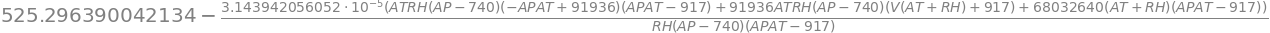

In [67]:

print('We examined your input data, defined by your data dictionary as:\n\n')
print(yourDictionary)

# use   str(symplified_best)   to get the string of the symplified model
print('\n\n','and using it, and potentially some features, evolved a solution\n\n') 
print('\n\n', str(symplified_best), '\n\n\n\nwhich formally is presented as:\n\n\n\n')

# print it out in latex-like formulae view
from sympy import *
init_printing()
symplified_best

### 4.1.3 Visualise the winning genetic structure
If you are interested in the expression tree corresponding to the individual, i.e., the genotype/phenotype system, *geppy* supports tree visualization by the `graph` and the `export_expression_tree` functions:

- `graph` only outputs the nodes and links information to describe the tree topology, with which you can render the tree with tools you like;
- `export_expression_tree` implements tree visualization with data generated by `graph` internally using the `graphviz` package. 

**Note**: even if the linear scaling is applied, here only the raw individual in GP (i.e., the one without linear scaling) is visualized.

In [68]:
 # we want to use symbol labels instead of words in the tree graph
rename_labels = {'add': '+', 'sub': '-', 'mul': '*', 'protected_div': '/'}  
gep.export_expression_tree(best_ind, rename_labels, 'data/numerical_expression_tree.png')

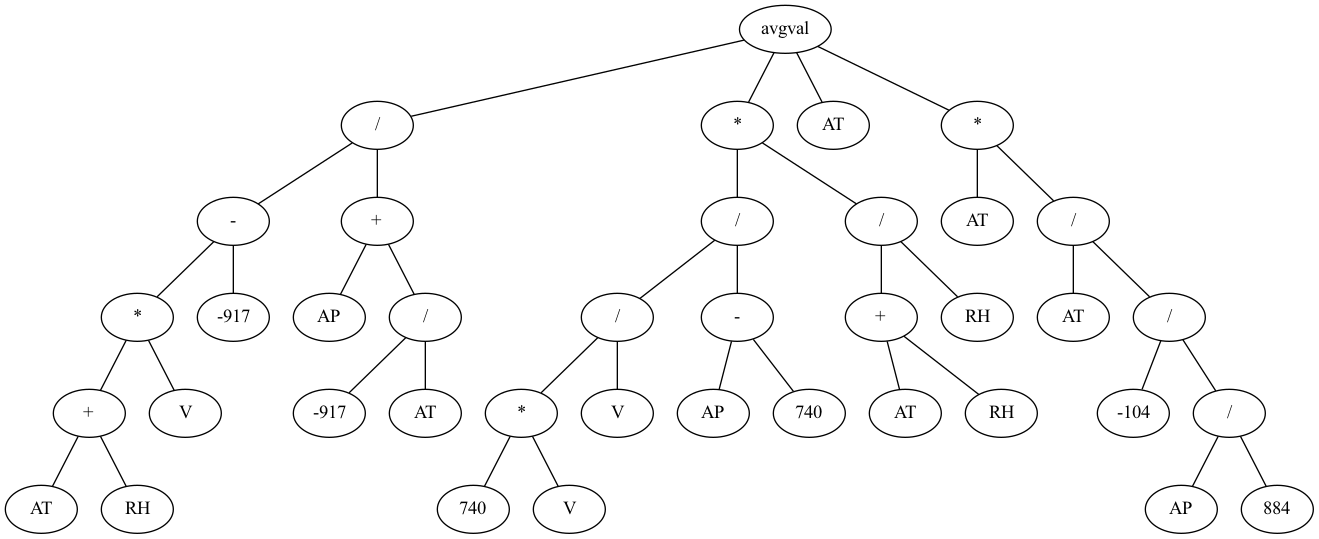

In [69]:
 # show the above image here for convenience
from IPython.display import Image
Image(filename='data/numerical_expression_tree.png')

## 4.2 Measure Performance

Earlier, we split our data into train and test chunks. 

GEPPY never saw your holdout dataset that we prepared, so let's apply our model to the holdout, and confirm how well it did.

### 4.2.1 Convert the Model into an Executable Function

In [70]:
# we define this helper function that takes in a geppy model, and data, and applies it.

def CalculateBestModelOutput(testdata, model):
    
    # ensure our data is a pandas data frame
    ourdataframe = pd.DataFrame(testdata)
    ourdataframe = ourdataframe.reset_index()
    
    # Ideally numexpr is used to parse our model and execute it. It's very high performance, and pandas eval
    # allows us to set a target dataframe, and the text string we pass understands the column names in our df.

    # Our model is a string, from sympy, but we can evaluate in pandas if it's compatible with numexpr, and evaluate it quick, as so:
    #results = pd.eval('Yp = ' + model, target=ourdataframe, inplace=true)

    ## documentation example is:
    ## pandas.eval(expr, parser='pandas', engine='numexpr', truediv=True, local_dict=None, global_dict=None, resolvers=(), level=0, target=None)¶
    
    # return the calculated results back as a numpy array of floats, to pass sklearn etc.
    
    ourdataframe.eval('Yp = ' + model, inplace = True)
    
    ourdataframe.Yp.replace(np.inf, np.nan)
    ourdataframe.Yp.replace(np.NINF, np.nan)
    return ourdataframe.Yp.to_numpy(dtype=float)

# the old function
#import pandas as pd

#def CalculateBestModelOutput(testdata, model):
#    
#    df = pd.DataFrame(testdata)
#    df = df.reset_index()
##  
#    # Print the first dataframe
#    df.eval('Yp = ' + model, inplace = True)
#    return df.Yp.to_numpy(dtype=float)



### 4.2.2 Apply the model to holdout data

note it is also applied to the training data, so we have both to compare against, to check for overfitting

In [71]:
# debug stuff
# import numexpr as ne
# print(ne.__version__)
# print (pd.__version__)

In [72]:
# apply best model to holdout data
holdout_Yp = CalculateBestModelOutput(holdout, str(symplified_best))

# apply best model to training data
train_Yp = CalculateBestModelOutput(train, str(symplified_best))

In [73]:
# test. more debug stuff

#testresults = pd.eval("-145898.956442581 -arctan(C + avgC)", target=holdout)
#testresults


In [74]:
# make our holdout and training data predictions available in python globally, to drive sklearn etc, using our globals trick
for term in finalTarget:
    globals()['holdout_Yt'] = holdout[term].values
    print('setting ', 'holdout_Yt')
    globals()['train_Y'] = train[term].values
    print('setting ', 'train_Y')

setting  holdout_Yt
setting  train_Y


### 4.2.3 Calculate <span style="color:blue">MSE</span>  and <span style="color:blue">R2</span> for holdout data

In [75]:
def colorful(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

holdout_mse = mean_squared_error(np.nan_to_num(holdout_Yp.squeeze(), neginf=0), holdout_Yt)
holdout_r2 = r2_score(holdout_Yt, np.nan_to_num(holdout_Yp.squeeze()))


In [77]:
# sklearn keeps throwing errors when we assess the MSE due to nan/zoo and numbers exceeding float64 etc.
# but we have seen huge amounts of data and calculated mse ... on train data.
# so why is it?

# maybe we should take the code we use to drive evolution (mse calculator) and use that one to find the MSE on holdout.
# hopefully we don't see errors!
#holdout_Yp
#.squeeze()
#holdout_Yt.max()
#holdout_r2 = r2_score(holdout_Yt, holdout_Yp)
##from numpy import inf
#holdout_Yp[1][ == -inf] = 0
#holdout_Yp

#np.nan_to_num(holdout_Yp, neginf=0)

In [78]:
# print out our final performance scores. make it standout in pink!
head = "###################################################"
mse_text = "      Mean squared error: %.2f" % holdout_mse
r2_text  = "      R2 score : %.2f" % holdout_r2

print('\n')
print(colorful(0,50,255,head))
print(colorful(0,50,255," Performance on our holdout dataset is as follows:\n"))
print(colorful(255,0,255,mse_text))
print(colorful(255,0,255,r2_text), '\n')
print(colorful(0,50,255,head))
print('\n')



################################################### 
 Performance on our holdout dataset is as follows:
 
      Mean squared error: 17.65 
      R2 score : 0.94  

################################################### 




### 4.2.4 Quick study of the holdout errors

In [79]:
# quick study of the errors. (Tells us the typcial plus/minus we could expect on predicting target variable for new data.)

holdout_prediction_errors = pd.DataFrame(holdout_Yp.squeeze() - holdout_Yt, columns = ['Holdout Absolute Prediction Error'])
holdout_prediction_errors.describe()

,Holdout Absolute Prediction Error
count,4872.000000
mean,-0.050887
std,4.201871
min,-18.643442
25%,-3.023366
50%,-0.050878
75%,2.849933
max,30.771334


## 4.3 Visualisation of Model Performance

### 4.3.1. Plot actual vs prediction

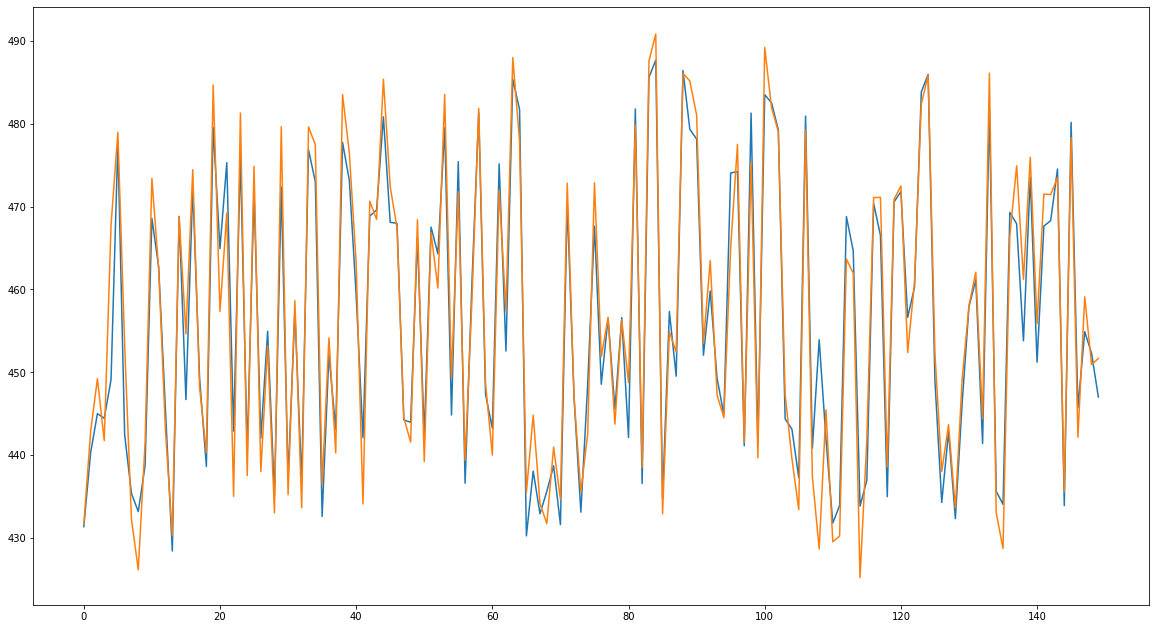

In [80]:
from matplotlib import pyplot

startrow = len(holdout_Yp)-150
endrow = len(holdout_Yp)

pyplot.rcParams['figure.figsize'] = [20, 11]
pyplot.plot(holdout_Yp[startrow:endrow])      # predictions are in blue
pyplot.plot(holdout_Yt[startrow:endrow])      # actual values are in orange
pyplot.show()

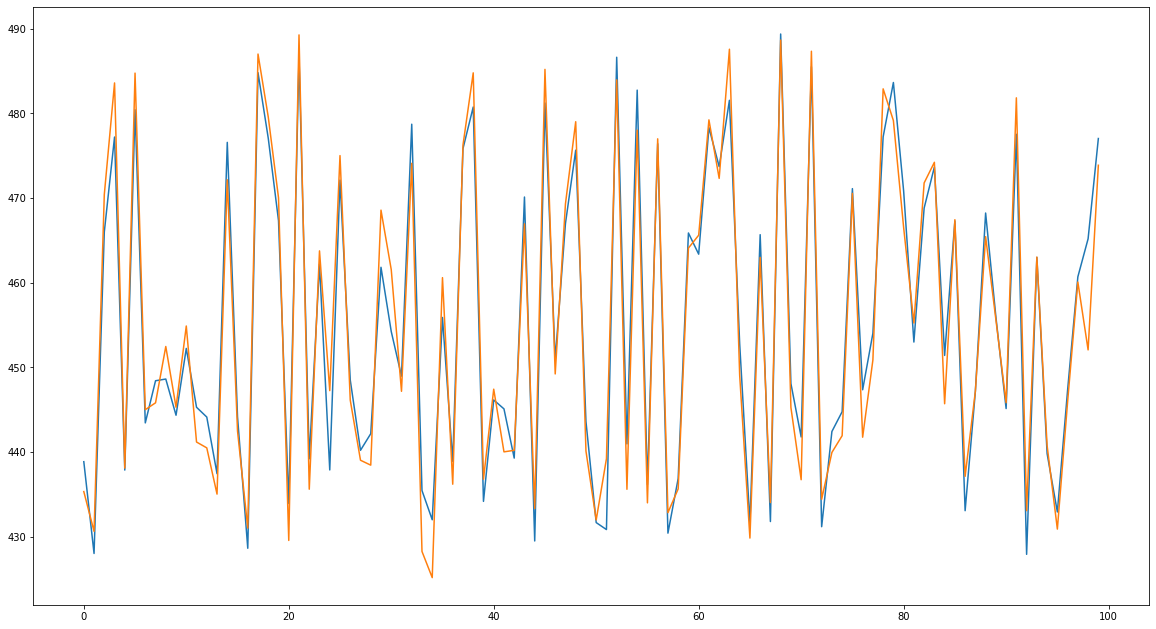

In [81]:
from matplotlib import pyplot

# zoom in by setting your start/end range here
startrow = 100
endrow = 200

pyplot.rcParams['figure.figsize'] = [20, 11]
pyplot.plot(holdout_Yp[startrow:endrow])      # predictions are in blue
pyplot.plot(holdout_Yt[startrow:endrow])      # actual values are in orange
pyplot.show()

### 4.3.1. Histogram of Prediction Errors on the holdout

In [82]:
# set your histogram bin size here
numBins = 50

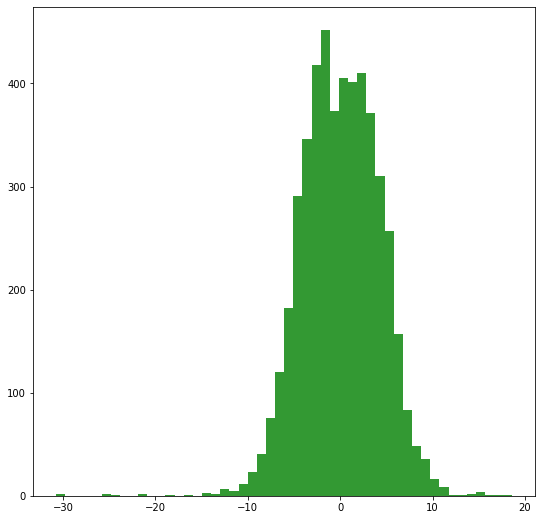

In [83]:
pyplot.rcParams['figure.figsize'] = [9, 9]
hfig = pyplot.figure()
ax = hfig.add_subplot(111)
ax.hist( holdout_Yt - holdout_Yp, numBins,color='green',alpha=0.8)
pyplot.show()

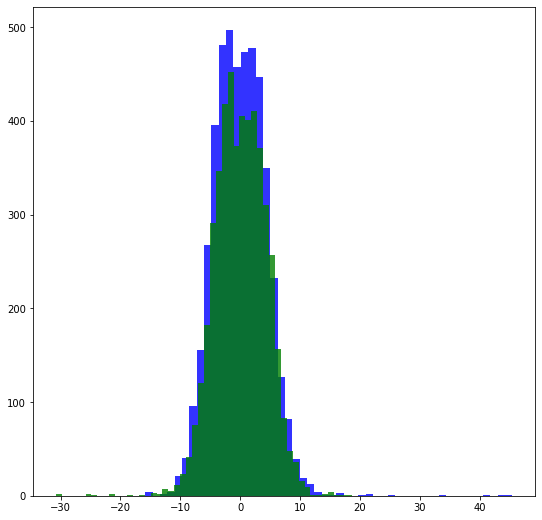

In [84]:
# Lets look at overfitting - to see if there is a big difference between train, and holdout
pyplot.rcParams['figure.figsize'] = [9, 9]
hfig = pyplot.figure()
ax = hfig.add_subplot(111)

ax.hist(train_Yp - train_Y,numBins,color='blue',alpha=0.8)     # blue: the errors seen in training data
ax.hist(holdout_Yt-holdout_Yp,numBins,color='green',alpha=0.8) # green: the errors seen in holdout data
pyplot.show()

# training vs holdout errors: do we see overfitting going on? 
# we can tell if the errors on holdout are very wide compared to narrow ones in training
# plus, the "shape" should be similar, with green values squashed reflecting test/train split.

# blue is training errors
# green is holdout errors

# 5.0 Deployment

### Is it worth implementing the answer?
Deploying ML solutions to production can often be expensive. Doing nothing is invariably the alternative to a spending money delivering ML produced models into production. It implies a "business case" question we should answer when we conclude the study:
If the business people selling the power plant outputs resorted to a common impulse to use the "average output" of the plant over the time period to be the "estimate" of plant output (I call this the worst practical predictor) - what would this very low cost alternative look like? How would using Machine Learning improve the business over and above what they would see as the cheapest strategy?
#### How bad is the simple estimate, versus our found solution?
Let's examine the histogram of errors of the alternative "do nothing" approach to estimation, using the worst predictor, an average.

### Simple averages are not great
The simple average approach gives us a plus/minus 40 on the value, which is not bell curve shaped, meaning the business will feel the estimates are generally poor most of the time.
In contrast, our symbolic regression gives us a nice bell curve shaped estimate, that is plus/minus 14 on a particularly bad day, and otherwise plus/minus 8 ... so a far far better estimate.



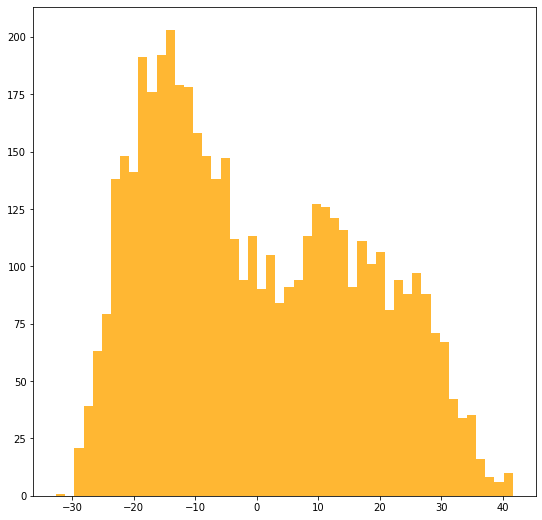

In [85]:
# plot the WORST predictor's errors, which is the average of target values in training data.

pyplot.rcParams['figure.figsize'] = [9, 9]
hfig2 = pyplot.figure()
ax = hfig2.add_subplot(111)
ax.hist(holdout_Yt-holdout_Yt.mean(),numBins,color='orange',alpha=0.8)
pyplot.show()

# Business Value
Let's compare the cheapest solution (using average value) against our solution, having roughtly similar cost

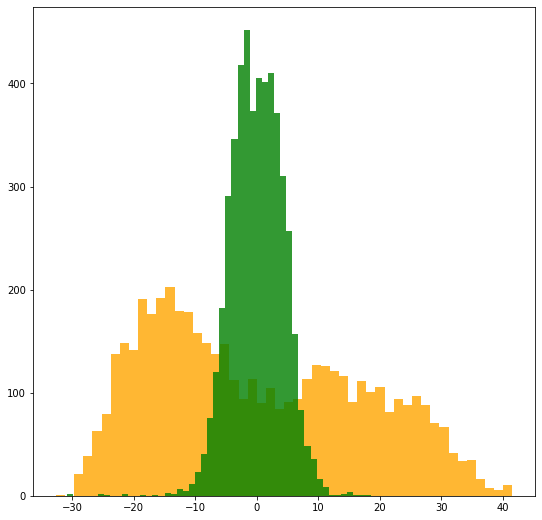

In [86]:
pyplot.rcParams['figure.figsize'] = [9, 9]
hfig3 = pyplot.figure()
ax = hfig3.add_subplot(111)
ax.hist(holdout_Yt-holdout_Yt.mean(),numBins,color='orange',alpha=0.8)  # green: errors using the average value as predictor
ax.hist(holdout_Yt-holdout_Yp,numBins,color='green',alpha=0.8)          # orange: errors using our model
pyplot.show()

# we should see our model in green really tightening up on the predictions (narrow histogram) vs the average-as-predictor
# this also helps to explain the benefit of the model in terms of improved plus/minus prediction

# green = our model
# orange = worst predictor

### Next Steps: Implementation
The implementation cost of getting our symbolic regression based estimator into production is very very low as a general rule of thumb. 

This is because the regression equation can be quickly re-written into any target system or programming language imaginable very quickly. The complete model portability of the equations produced are a huge benefit of the method.

In the power plant for example, they could simply add this equation into the spreadsheet where they are maintaining the raw data to get this benefit. 

### Footnotes:

License: **MIT**

Update: **June 15th, 2022**

Author: ** Andrew Morgan**

About the Author:

Andrew is a 25 year veteran in data engineering and data science. He currently works as the Director of Data 6point6 (a specialist technology firm) and is based in London. He is also the author of **Mastering Spark for Data Science**) found here https://www.amazon.co.uk/Mastering-Spark-Science-Andrew-Morgan/dp/1785882147.
